In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ydata_profiling import ProfileReport


/Users/shreyas/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/shreyas/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [4]:
combined_df = pd.read_csv('../CSV/combined_final_last_10_years.csv')
gini_df = pd.read_csv('../CSV/gini.csv')
income_df = pd.read_csv('../CSV/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [15]:
combined_df.head(20)

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
0,Africa,"Congo, Dem. Rep.",2006,27.6,605,14.6,6.83,42.2
1,Africa,"Congo, Dem. Rep.",2007,25.2,623,13.7,6.99,42.1
2,Africa,"Congo, Dem. Rep.",2008,22.8,640,10.9,8.97,42.1
3,Africa,"Congo, Dem. Rep.",2009,22.1,637,14.6,7.89,42.1
4,Africa,"Congo, Dem. Rep.",2010,21.5,660,28.8,8.35,42.1
5,Africa,"Congo, Rep.",2006,31.9,5000,21.6,5.79,47.6
6,Africa,"Congo, Rep.",2007,30.6,4760,21.8,6.60,47.9
7,Africa,"Congo, Rep.",2008,29.4,4850,18.3,5.95,48.1
8,Africa,"Congo, Rep.",2009,29.1,5050,22.5,8.40,48.4
9,Africa,"Congo, Rep.",2010,28.9,5320,20.5,7.60,48.6


In [6]:
combined_df.describe()

,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2010.913290,62.083306,20520.390600,24.386224,16.768777,38.044084
std,3.083815,20.569704,19421.169132,7.957001,7.625846,8.391579
min,2006.000000,16.600000,605.000000,0.000000,0.043500,24.400000
25%,2008.000000,46.250000,5935.000000,19.500000,12.325000,32.100000
50%,2011.000000,64.900000,13700.000000,23.200000,15.900000,36.000000
75%,2014.000000,78.800000,31175.000000,27.700000,21.300000,42.575000
max,2016.000000,99.300000,120000.000000,67.900000,62.900000,63.900000


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          1234 non-null   object 
 1   country            1234 non-null   object 
 2   year               1234 non-null   int64  
 3   demox_eiu          1234 non-null   float64
 4   income_per_person  1234 non-null   int64  
 5   invest_%_gdp       1234 non-null   float64
 6   tax_%_gdp          1234 non-null   float64
 7   gini_index         1234 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 77.3+ KB


In [8]:
# profile = ProfileReport(combined_df, title='Pandas Profiling Report', explorative=True)
# profile.to_file("Combined.html")

### Analysis of the gini index

In [9]:
gini_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,...,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769
std,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,...,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433
min,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000
50%,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000
75%,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,...,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000
max,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000


##### See if income inequality has increased over the past 200 years

In [10]:
gini_df_copy = gini_df.copy()

In [11]:
## Add a new row to the dataframe of the mean of the entire column and skip the first column
# Assuming df is your DataFrame
mean_row = gini_df_copy.iloc[:, 1:].mean()  # Calculate the mean of each column, excluding the first one

mean_row = pd.DataFrame(mean_row, columns=['Index'])  # Convert the mean_row to DataFrame and transpose it
## Convert the index to a column
mean_row.reset_index(level=0, inplace=True)
mean_row.columns = ['Year', 'Index']  # Rename the columns
mean_row

,Year,Index
0,1800,41.411282
1,1801,41.411282
2,1802,41.411282
3,1803,41.411282
4,1804,41.411282
...,...,...
236,2036,38.850769
237,2037,38.850769
238,2038,38.850769
239,2039,38.850769


In [12]:
mean_row['Year'] = mean_row['Year'].astype(int)
mean_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    241 non-null    int64  
 1   Index   241 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.9 KB


In [13]:
gini_df_copy

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,...,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9
191,Vietnam,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,...,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3
192,Yemen,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,...,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7
193,Zambia,54.5,54.5,54.5,54.5,54.5,54.5,54.5,54.5,54.5,...,57.1,57.1,57.1,57.1,57.1,57.1,57.1,57.1,57.1,57.1


/Users/shreyas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shreyas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shreyas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shreyas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

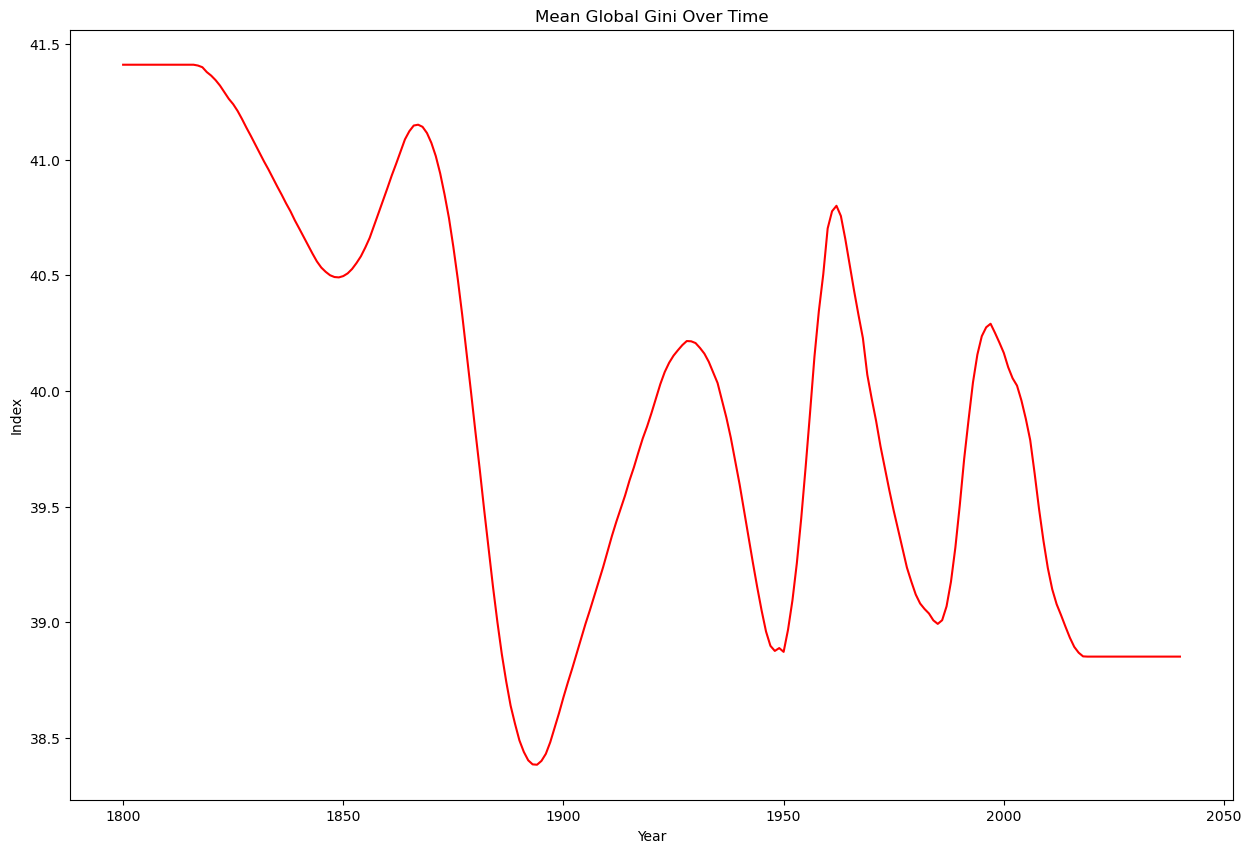

In [14]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=mean_row, x="Year", y="Index", color='red')
plt.title('Mean Global Gini Over Time')
plt.show()